# Data Transformation of training and testing data

In [1]:
from sklearn.datasets import make_friedman1
import numpy as np
import matplotlib.pyplot as plt

## Transformation only on test set

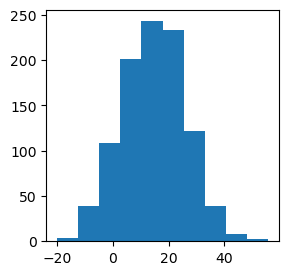

In [2]:
# without any transformation
X_test, y_test = make_friedman1(n_samples=1000, n_features=10, noise=10, random_state=1)
min_y_test = min(y_test)

fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_test)
plt.show()

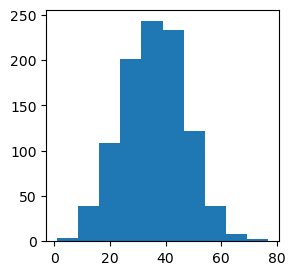

In [3]:
# shift test data
y_shifted = y_test - min_y_test + 1.00000001

# plot y_test
fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_shifted)
plt.show()

9.999999889225291e-09


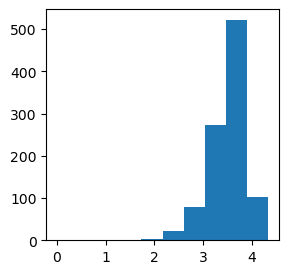

In [4]:
# Transformation: log
y_test_log = np.log(y_shifted)
min_y_test_log = min(y_test_log)
print(min_y_test_log)

# plot y_test
fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_test_log)
plt.show()

## Relation n_samples and value range
The more samples we sample from friedman, the higher is the value range.

 n_samples = 100, min_y_test = -21.031220350339687, max_y_test = 45.988172012534534, value_range = 67.01939236287421
 n_samples = 1000, min_y_test = -20.092176210610162, max_y_test = 55.75164736040433, value_range = 75.8438235710145
 n_samples = 10000, min_y_test = -27.370305999509668, max_y_test = 53.42337405812327, value_range = 80.79368005763294
 n_samples = 100000, min_y_test = -34.66241344987967, max_y_test = 58.444854248270815, value_range = 93.10726769815048


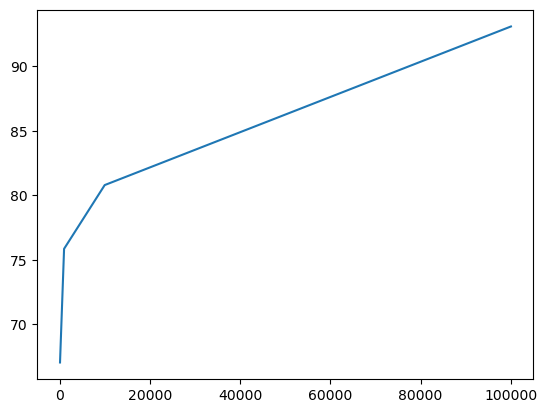

In [5]:
value_range_n_samples = []
n_samples_levels = [100, 1000, 10000, 100000]
for n_samples in n_samples_levels:
    X_test, y_test = make_friedman1(n_samples=n_samples, n_features=10, noise=10, random_state=1)
    min_y_test = min(y_test)
    max_y_test = max(y_test)
    print(f" n_samples = {n_samples}, min_y_test = {min_y_test}, max_y_test = {max_y_test}, value_range = {max_y_test - min_y_test}")
    value_range_n_samples.append(max_y_test - min_y_test)


plt.plot(n_samples_levels, value_range_n_samples)
plt.show()


## Relation noise and value range
The higher the noise, the higher is the value range.

 noise = 0, min_y_test = 2.348039772245312, max_y_test = 26.542451179536272,  value_range = 24.19441140729096
 noise = 0.5, min_y_test = 2.6016786724760568, max_y_test = 26.65351896302771,  value_range = 24.051840290551652
 noise = 5, min_y_test = -4.489508258061578, max_y_test = 37.685262324988585,  value_range = 42.17477058305016
 noise = 10, min_y_test = -20.092176210610162, max_y_test = 55.75164736040433,  value_range = 75.8438235710145
 noise = 20, min_y_test = -52.28349726684858, max_y_test = 91.8844174312358,  value_range = 144.1679146980844


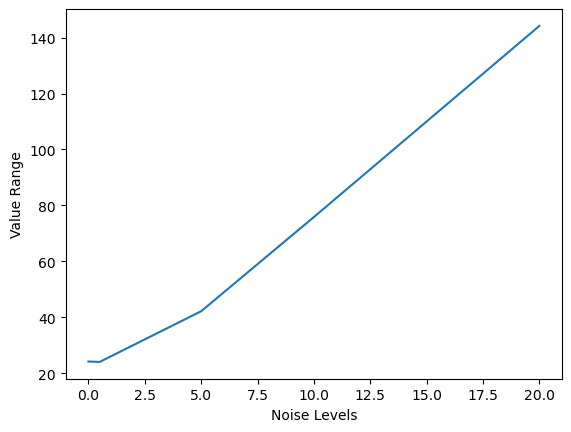

In [6]:
value_range_n_noise = []
noise_levels = [0, 0.5, 5, 10, 20]

for noise in noise_levels:
    X_test, y_test = make_friedman1(n_samples=1000, n_features=10, noise=noise, random_state=1)
    min_y_test = min(y_test)
    max_y_test = max(y_test)
    value_range_n_noise.append(max_y_test - min_y_test)
    print(f" noise = {noise}, min_y_test = {min_y_test}, max_y_test = {max_y_test},  value_range = {max_y_test - min_y_test}")

plt.plot(noise_levels, value_range_n_noise)
plt.xlabel('Noise Levels')
plt.ylabel('Value Range')
plt.show()

## Transforming train and test data with logarithm

Shifting is not happening:


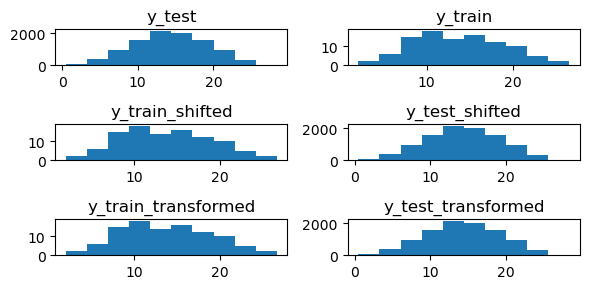

min_y_train: 2.053748953305834
min_y_test: 0.4779348212857602
min_data: 0.4779348212857602

Shifting is happening wiht 1.3648881267320532:


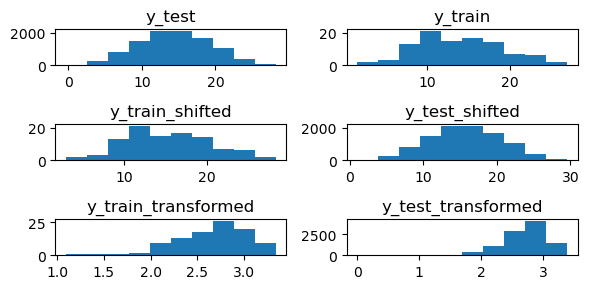

min_y_train: 1.6106393907304006
min_y_test: -0.3648881167320533
min_data: -0.3648881167320533

Shifting is happening wiht 11.696757906008774:


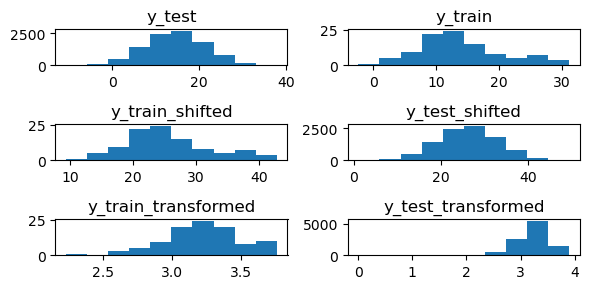

min_y_train: -2.377346672448499
min_y_test: -10.696757896008773
min_data: -10.696757896008773

Shifting is happening wiht 28.37030600950967:


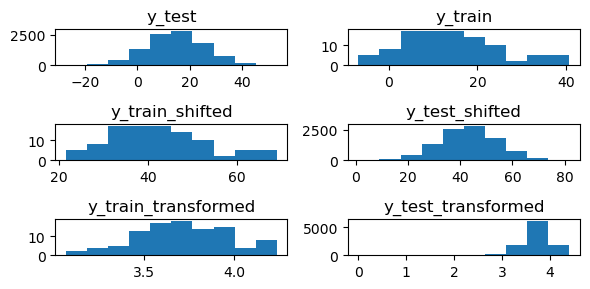

min_y_train: -6.808442298202832
min_y_test: -27.370305999509668
min_data: -27.370305999509668

Shifting is happening wiht 63.21186160185214:


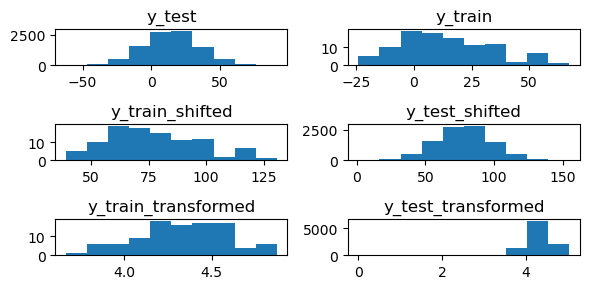

min_y_train: -24.149804269944035
min_y_test: -62.21186159185214
min_data: -62.21186159185214



In [7]:
for noise in [0, 0.5, 5, 10, 20]:
    fig, axs = plt.subplots(3, 2, figsize=(6, 3))
    X_test, y_test = make_friedman1(n_samples=10000, n_features=10, noise=noise, random_state=1)
    min_y_test = min(y_test)

    axs[0, 0].hist(y_test)
    axs[0, 0].set_title('y_test')

    X_train, y_train = make_friedman1(n_samples=100, n_features=10, noise=noise, random_state=2)

    axs[0, 1].hist(y_train)
    axs[0, 1].set_title('y_train')

    min_y_train = min(y_train)
    min_data = min(min_y_train, min_y_test)

    if min_data < 0:
        shifiting = abs(min_data) + 1.00000001
        y_train_shifted = y_train + shifiting
        y_test_shifted = y_test + shifiting
        y_train_transformed = np.log(y_train_shifted)
        y_test_transformed = np.log(y_test_shifted)
        print(f"Shifting is happening wiht {shifiting}:")
    else:
        print(f"Shifting is not happening:")
        y_train_shifted = y_train_transformed = y_train
        y_test_shifted = y_test_transformed = y_test

    axs[1, 0].hist(y_train_shifted)
    axs[1, 0].set_title('y_train_shifted')

    axs[1, 1].hist(y_test_shifted)
    axs[1, 1].set_title('y_test_shifted')

    # Add histograms of y_train_shifted and y_test_shifted to the grid
    axs[2, 0].hist(y_train_transformed)
    axs[2, 0].set_title('y_train_transformed')

    axs[2, 1].hist(y_test_transformed)
    axs[2, 1].set_title('y_test_transformed')

    plt.tight_layout()
    plt.show()

    print(f"min_y_train: {min_y_train}")
    print(f"min_y_test: {min_y_test}")
    print(f"min_data: {min_data}\n")


In [8]:
def generate_data(n_samples_training =100, n_samples_test= 10000, noise = 0, n_features = 10, random_state_trainning = 1, transformation='log'):
    X_test, y_test = make_friedman1(n_samples=n_samples_test, n_features=n_features, noise=noise, random_state=1781)
    X_train, y_train = make_friedman1(n_samples=n_samples_training, n_features=n_features, noise=noise, random_state=random_state_trainning)
    min_y_test = min(y_test)
    min_y_train = min(y_train)
    min_data = min(min_y_train, min_y_test)

    if min_data < 0:
        y_train = transform(y_train, transformation, shifting=abs(min_data))
        y_test = transform(y_test, transformation='log', shifting=abs(min_data))
        print(y_train)
    return X_train, y_train_transformed, X_test, y_test_transformed


def transform(y, transformation='log', shifting=0):
        '''
        Function to transform the target variable.
        Inputs:
            transformation: the transformation to be applied
        Outputs:
            None (it transforms the target variable of the dataframe and of y itself)
        '''

        if transformation == 'identity':
            pass
        elif transformation == 'log':
            if shifting >0:
                 shifting = shifting + 1.00000001
            y = np.log(y + shifting)
        elif transformation == 'sqrt':
            y = np.sqrt(y + shifting)
        else:
            raise ValueError('Transformation not implemented.')
        return y

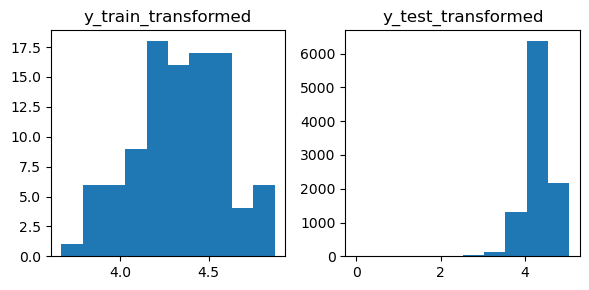

In [9]:
X_train, y_train_transformed, X_test, y_test_transformed = generate_data(n_samples_training =100, n_samples_test= 10000, noise = 0, n_features = 10, random_state_trainning = 1, transformation='sqrt')


#plot y_train_transformed and y_test_transformed
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].hist(y_train_transformed)
axs[0].set_title('y_train_transformed')

axs[1].hist(y_test_transformed)
axs[1].set_title('y_test_transformed')

plt.tight_layout()
plt.show()

### Some further tests

/home/ru89yug/miniconda3/envs/slds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ru89yug/miniconda3/envs/slds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


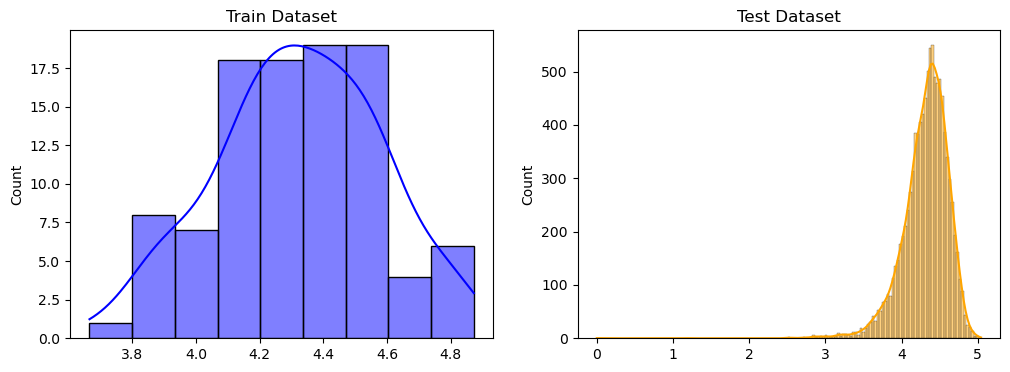

100
10000


In [10]:
import seaborn as sns
import pandas as pd

# Show here histograms of train and train datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(y_train_transformed, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Train Dataset')

sns.histplot(y_test_transformed,   kde=True, ax=axes[1], color='orange')
axes[1].set_title('Test Dataset')

plt.show()

print(len(y_train_transformed))
print(len(y_test_transformed))

In [11]:
print(y_train_transformed)
print(y_train_transformed.shape)

[4.51697835 4.79122426 4.28853581 4.19311136 4.09795014 4.39034254
 4.10739786 3.91457787 4.19734321 4.45238044 4.30986984 4.05331701
 4.37060212 3.82900331 3.79937005 4.59554975 4.4262949  4.77351755
 3.92029591 4.51397306 4.25623206 4.87284198 4.29520507 4.25128671
 4.39951508 4.30502435 4.07087352 4.53479323 4.64057769 4.55786658
 4.40072281 4.24655778 4.10806098 4.43105918 3.95408181 4.77615107
 4.29248501 4.14083599 4.57392854 4.27883517 4.57925458 4.30789024
 4.7952466  4.37397893 3.6651516  3.84844036 3.89577903 4.55688709
 4.72990968 4.28840567 3.95303638 4.56725316 4.46629687 4.30667565
 4.41272824 4.29590155 3.89760003 4.54395922 4.16040756 4.19304784
 4.18487721 4.73642094 4.78495012 4.58889919 4.23531011 4.04782073
 4.41534231 4.35002806 4.40527077 4.01405041 3.86159729 4.10914508
 4.49260795 4.59082567 4.19450757 4.56978363 4.44760417 4.21348176
 4.4042086  4.53418685 4.15462516 4.59820261 4.17323207 4.34577818
 4.2223265  3.96501458 4.39682848 4.274334   4.18817094 4.1629

In [12]:
print(y_test_transformed)
print(y_test_transformed.shape)

[4.58708796 3.88938266 4.31278435 ... 3.89532499 4.39316951 4.3441875 ]
(10000,)
